# readme
descrip: plot EOF analysis for Altimeter SSH for North Atlantic

update history: <br>
v1.0 DL 2021Mar30 <br>
v1.1 DL 2021Apr05

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
# import matplotlib.dates as mdates
%matplotlib inline
import cartopy
cartopy.config['pre_existing_data_dir']='/scratch/group/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
# from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xesmf as xe

from eofs.xarray import Eof

# dask jupyter lab packages
# from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

In [2]:
indir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/SSH/'
infile1_TH = indir + 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100.regrid_2021Apr05.nc'
lat1, lat2 = 20, 65
lon1, lon2 = -90+360, 360 # 90W
ds_TH = xr.open_dataset(infile1_TH)
ssh_TH_yr = ds_TH.SSH.sel(lat=slice(lat1, lat2),lon=slice(lon1, lon2)) # unit: cm
ssh_TH_yr

<xarray.DataArray 'SSH' (time: 251, lat: 450, lon: 900)>
[101655000 values with dtype=float32]
Coordinates:
  * time     (time) object 1850-07-16 21:59:59.999997 ... 2100-07-02 05:00:00...
  * lat      (lat) float32 20.05 20.15 20.25 20.35 ... 64.65 64.75 64.85 64.95
  * lon      (lon) float32 270.0 270.1 270.2 270.3 ... 359.6 359.7 359.8 359.9
Attributes:
    spatial_op:    Bilinear remapping: 1st order: fracarea: NCL: ./map_tx0.1v...
    cell_methods:  time: mean
    grid_loc:      2110
    coordinates:   TLONG TLAT 
    units:         centimeter
    long_name:     Sea Surface Height

In [3]:
ssh_TH_yra = ssh_TH_yr - ssh_TH_yr.mean('time') # yra: yearly anomaly
ssh_TH_yra

<xarray.DataArray 'SSH' (time: 251, lat: 450, lon: 900)>
array([[[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ...,   7.4691086 ,
           7.1593933 ,   6.811676  ],
        [         nan,          nan,          nan, ...,   6.080864  ,
           5.8350067 ,   5.5475845 ],
        [         nan,          nan,          nan, ...,   5.0908203 ,
           5.0030136 ,   4.8678436 ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
...
        [         nan,          nan,          nan, ..., -13.305321  ,
         -13.499718  , -13.704582  ],
        [         nan,          nan,          nan, ..., -12.776268  ,
         -13.018814  , -13.269577  ],
        [         nan,          nan,          nan, ..., -12.175728  ,
         -12.4590225 , -12.775711  ]],

       [[         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        [         nan,          nan,          nan, ...,          nan,
                  nan,          nan],
        ...,
        [         nan,          nan,          nan, ..., -14.703697  ,
         -14.749359  , -14.794838  ],
        [         nan,          nan,          nan, ..., -14.649811  ,
         -14.716278  , -14.770096  ],
        [         nan,          nan,          nan, ..., -14.563309  ,
         -14.6416855 , -14.722618  ]]], dtype=float32)
Coordinates:
  * time     (time) object 1850-07-16 21:59:59.999997 ... 2100-07-02 05:00:00...
  * lat      (lat) float32 20.05 20.15 20.25 20.35 ... 64.65 64.75 64.85 64.95
  * lon      (lon) float32 270.0 270.1 270.2 270.3 ... 359.6 359.7 359.8 359.9

In [4]:
coslat = np.cos(np.deg2rad(ssh_TH_yra.coords['lat'].values)).clip(0., 1.)
wgts = np.sqrt(coslat)[..., np.newaxis]
solver = Eof(ssh_TH_yra, weights=wgts)
variance_fractions = solver.varianceFraction(neigs=3)
variance_fractions

<xarray.DataArray 'variance_fractions' (mode: 3)>
array([0.35176462, 0.06708823, 0.04294191], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
Attributes:
    long_name:  variance_fractions

<xarray.DataArray 'eofs' (mode: 3, lat: 450, lon: 900)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.00038661,
         -0.00037679, -0.00036765],
        [        nan,         nan,         nan, ..., -0.0004098 ,
         -0.00040042, -0.00039196],
        [        nan,         nan,         nan, ..., -0.0004205 ,
         -0.00041192, -0.00040433]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.00078938,
          0.00080133,  0.00081462],
        [        nan,         nan,         nan, ...,  0.00081649,
          0.00082341,  0.00083243],
        [        nan,         nan,         nan, ...,  0.00082252,
          0.00082636,  0.00082936]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  0.00109644,
          0.00105533,  0.00102113],
        [        nan,         nan,         nan, ...,  0.00112353,
          0.00108336,  0.00104067],
        [        nan,         nan,         nan, ...,  0.00117983,
          0.00113801,  0.00110335]]], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
  * lat      (lat) float32 20.05 20.15 20.25 20.35 ... 64.65 64.75 64.85 64.95
  * lon      (lon) float32 270.0 270.1 270.2 270.3 ... 359.6 359.7 359.8 359.9
Attributes:
    long_name:  empirical_orthogonal_functions

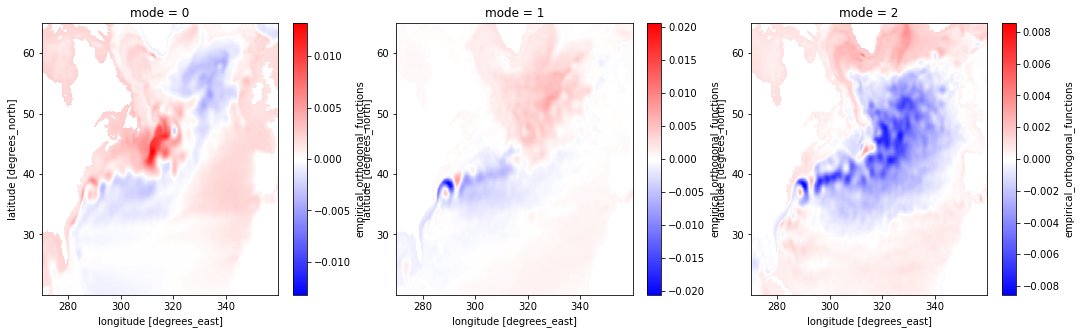

In [5]:
eofs = solver.eofs(neofs=3)
fig, axes = plt.subplots(1,3,figsize=(18,5))
eofs.sel(mode=0).plot(ax=axes[0], cmap='bwr')
eofs.sel(mode=1).plot(ax=axes[1], cmap='bwr')
eofs.sel(mode=2).plot(ax=axes[2], cmap='bwr')
eofs

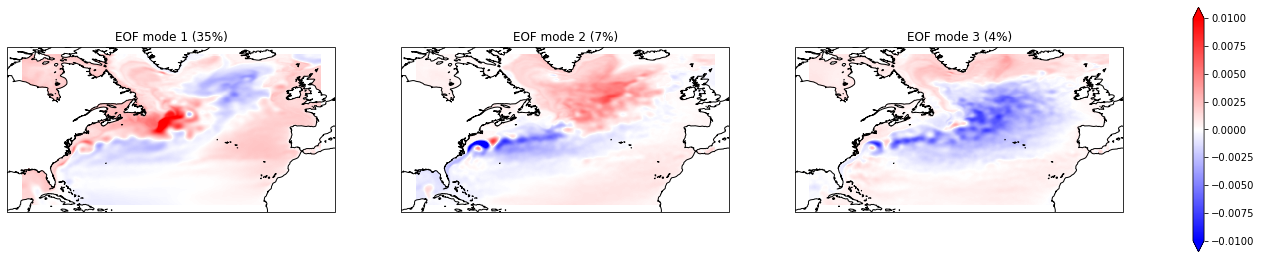

In [9]:
fig = plt.figure(figsize=(25, 6))
pc = cartopy.crs.PlateCarree()
ax1 = plt.subplot(131,projection=pc)
ax1.coastlines()
ax1.pcolormesh(ssh_TH_yra.lon, ssh_TH_yra.lat, eofs.sel(mode=0), vmin=-0.01, vmax=0.01,
               transform=pc,cmap='bwr')
ax1.set_title('EOF mode 1 (35%)')

ax2 = plt.subplot(132,projection=pc)
ax2.coastlines()
ax2.pcolormesh(ssh_TH_yra.lon, ssh_TH_yra.lat, eofs.sel(mode=1), vmin=-0.01, vmax=0.01,
               transform=pc,cmap='bwr')
ax2.set_title('EOF mode 2 (7%)')

ax3 = plt.subplot(133,projection=pc)
ax3.coastlines()
subplt3=ax3.pcolormesh(ssh_TH_yra.lon, ssh_TH_yra.lat, eofs.sel(mode=2), vmin=-0.01,vmax=0.01,
               transform=pc,cmap='bwr')
ax3.set_title('EOF mode 3 (4%)')

# Now adding the colorbar
cb = fig.colorbar(subplt3, ax=[ax1,ax2,ax3], shrink=0.75, extend='both')
# cb.set_label('SSH [cm]')

<xarray.DataArray 'pcs' (time: 251, mode: 3)>
array([[-2.43058980e-01,  1.05959615e-02, -7.19968438e-01],
       [-4.39118952e-01, -1.20086575e+00, -9.08367038e-02],
       [-6.25167370e-01,  2.27894664e-01, -2.74930745e-01],
       [-8.36879015e-01,  1.26053488e+00, -3.06867748e-01],
       [-6.66778684e-01,  8.71151268e-01, -4.56115007e-01],
       [-6.55918121e-01,  9.78446126e-01, -7.12432206e-01],
       [-6.54579461e-01,  7.18970060e-01, -1.85120368e+00],
       [-8.29469562e-01,  7.88544238e-01, -1.11512268e+00],
       [-7.38229811e-01,  9.55759823e-01, -7.54674673e-01],
       [-6.37091041e-01,  9.09756273e-02, -4.36544746e-01],
       [-7.56224811e-01,  2.81491637e-01, -5.29817462e-01],
       [-7.94749677e-01,  2.10447907e-01, -1.65399051e+00],
       [-8.58957410e-01, -7.29482353e-01, -1.87542963e+00],
       [-7.89386213e-01, -2.96947479e-01, -1.80494487e+00],
       [-9.87115920e-01,  2.95737147e-01, -1.96259081e+00],
       [-1.02501023e+00,  1.06357956e+00, -1.94371176e+00],
       [-9.88626480e-01,  4.47425574e-01, -1.90090334e+00],
       [-1.05762112e+00,  5.69259107e-01, -1.41021359e+00],
       [-9.32998002e-01,  7.95866013e-01, -2.01633525e+00],
       [-1.06875134e+00,  2.20038223e+00, -6.20414555e-01],
...
       [ 1.77614236e+00,  1.33169425e+00,  3.74493115e-02],
       [ 1.98917985e+00,  1.17192149e+00,  1.00969899e+00],
       [ 1.94110966e+00,  1.34622777e+00,  9.05705914e-02],
       [ 1.98305333e+00,  1.46955466e+00,  3.65270644e-01],
       [ 2.10262442e+00,  1.60308266e+00, -2.83971637e-01],
       [ 2.09801507e+00,  9.99454558e-01, -9.75853324e-01],
       [ 2.00405955e+00,  1.21699917e+00, -1.00573730e+00],
       [ 2.15949178e+00,  2.41246656e-01,  5.89460552e-01],
       [ 2.08036590e+00, -1.44207686e-01,  5.42193465e-02],
       [ 2.09021711e+00,  8.98559451e-01,  8.09967741e-02],
       [ 2.04153585e+00,  1.09587550e+00, -2.00654721e+00],
       [ 2.28492260e+00, -1.45998240e-01, -1.72666562e+00],
       [ 2.30291939e+00,  2.17391700e-01, -3.10085535e-01],
       [ 2.36526775e+00,  3.26413810e-01, -4.62403625e-01],
       [ 2.36190605e+00,  9.71448481e-01, -1.70862842e+00],
       [ 2.35545564e+00,  1.25914466e+00, -1.96563065e+00],
       [ 2.25297832e+00,  9.41477776e-01,  8.42226207e-01],
       [ 2.15383172e+00,  1.70620418e+00,  2.91052604e+00],
       [ 2.29363060e+00,  1.72763503e+00,  1.02843761e+00],
       [ 2.26372480e+00,  6.57956004e-01,  6.39233530e-01]], dtype=float32)
Coordinates:
  * time     (time) object 1850-07-16 21:59:59.999997 ... 2100-07-02 05:00:00...
  * mode     (mode) int64 0 1 2

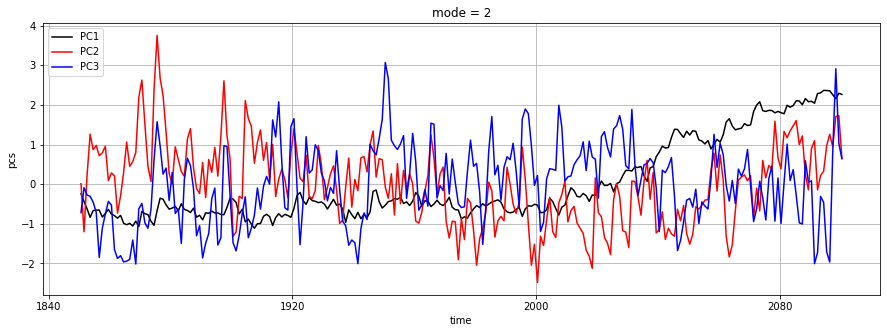

In [10]:
pcs = solver.pcs(npcs=3, pcscaling=1)
fig, axes = plt.subplots(1,1,figsize=(15,5))
pcs.sel(mode=0).plot(ax=axes, color='k',label='PC1')
pcs.sel(mode=1).plot(ax=axes, color='r',label='PC2')
pcs.sel(mode=2).plot(ax=axes, color='b',label='PC3')
plt.legend()
plt.grid()
pcs

<xarray.DataArray 'eofs' (mode: 3, lat: 450, lon: 900)>
array([[[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ..., -0.17259137,
         -0.16750273, -0.16276476],
        [        nan,         nan,         nan, ..., -0.19276942,
         -0.1877994 , -0.18327017],
        [        nan,         nan,         nan, ..., -0.20687044,
         -0.20225292, -0.19803703]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,  0.1538971 ,
          0.1555718 ,  0.15750019],
        [        nan,         nan,         nan, ...,  0.16773199,
          0.16865118,  0.16998051],
        [        nan,         nan,         nan, ...,  0.17671694,
          0.17719097,  0.17739737]],

       [[        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,  0.17102025,
          0.16391733,  0.15795235],
        [        nan,         nan,         nan, ...,  0.18465777,
          0.17752777,  0.17001297],
        [        nan,         nan,         nan, ...,  0.20279911,
          0.1952252 ,  0.18881385]]], dtype=float32)
Coordinates:
  * mode     (mode) int64 0 1 2
  * lat      (lat) float32 20.05 20.15 20.25 20.35 ... 64.65 64.75 64.85 64.95
  * lon      (lon) float32 270.0 270.1 270.2 270.3 ... 359.6 359.7 359.8 359.9
Attributes:
    long_name:  correlation_between_pcs_and_SSH

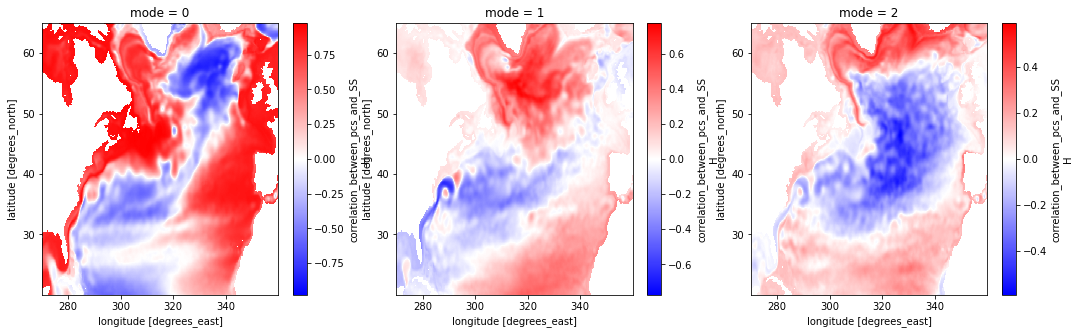

In [7]:
eofcorr = solver.eofsAsCorrelation(neofs=3)
fig, axes = plt.subplots(1,3,figsize=(18,5))
eofcorr.sel(mode=0).plot(ax=axes[0], cmap='bwr')
eofcorr.sel(mode=1).plot(ax=axes[1], cmap='bwr')
eofcorr.sel(mode=2).plot(ax=axes[2], cmap='bwr')
eofcorr